In [ ]:
#Comparison of bulk and pseudobulk Hi-C contact maps in PA and IVF embryos over the chr1:50.3–70.3 Mb region highlights local structural consistency across data types.
hicPlotTADs --tracks PA_bulk_vs_pseudobulk.ini -o PA_chr1-50300000-70300000.png --region chr1:50300000-70300000 --dpi 300
hicPlotTADs --tracks IVF_bulk_vs_pseudobulk.ini -o IVF_chr1-50300000-70300000.png --region chr1:50300000-70300000 --dpi 300


In [ ]:
#A/B compartment analysis was performed using HOMER at 1 Mb resolution for both bulk and pseudobulk Hi-C data from IVF and PA 4-cell embryos, enabling genome-wide comparison of compartment profiles across conditions.
makeTagDirectory tag_IVF_4C_bulk -format HiCsummary IVF_4C_bulk.homer
analyzeHiC tag_IVF_4C_bulk -cpu 16 -res 1000000 -bgonly
analyzeHiC tag_IVF_4C_bulk -cpu 8 -res 1000000 -norm -override > IVF_4C_bulk_whole_genome_matrix.txt
runHiCpca.pl IVF_4C_bulk_50kb_pca tag_IVF_4C_bulk -cpu 16 -res 1000000 -superRes 1000000 -genome Sus_scrofa11 -corrDepth 1

makeTagDirectory tag_IVF_4C_pseudobulk -format HiCsummary IVF_4C_pseudobulk.homer
analyzeHiC tag_IVF_4C_pseudobulk -cpu 16 -res 1000000 -bgonly
analyzeHiC tag_IVF_4C_pseudobulk -cpu 8 -res 1000000 -norm -override > IVF_4C_pseudobulk_whole_genome_matrix.txt
runHiCpca.pl IVF_4C_pseudobulk_50kb_pca tag_IVF_4C_pseudobulk -cpu 16 -res 1000000 -superRes 1000000 -genome Sus_scrofa11 -corrDepth 1

makeTagDirectory tag_PA_4C_bulk -format HiCsummary PA_4C_bulk.homer
analyzeHiC tag_PA_4C_bulk -cpu 16 -res 1000000 -bgonly
analyzeHiC tag_PA_4C_bulk -cpu 8 -res 1000000 -norm -override > PA_4C_bulk_whole_genome_matrix.txt
runHiCpca.pl PA_4C_bulk_50kb_pca tag_PA_4C_bulk -cpu 16 -res 1000000 -superRes 1000000 -genome Sus_scrofa11 -corrDepth 1

makeTagDirectory tag_PA_4C_pseudobulk -format HiCsummary PA_4C_pseudobulk.homer
analyzeHiC tag_PA_4C_pseudobulk -cpu 16 -res 1000000 -bgonly
analyzeHiC tag_PA_4C_pseudobulk -cpu 8 -res 1000000 -norm -override > PA_4C_pseudobulk_whole_genome_matrix.txt
runHiCpca.pl PA_4C_pseudobulk_50kb_pca tag_PA_4C_pseudobulk -cpu 16 -res 1000000 -superRes 1000000 -genome Sus_scrofa11 -corrDepth 1


In [ ]:
#TAD boundary  detection was performed by converting sparse Hi-C matrices to dense format followed by insulation score analysis using a 500 kb window size and mean-based insulation metric.
sparseToDense.py -i -g Sus_scrofa.Sscrofa11.1.dna.toplevel.fa -b 40k_bin.bed -o ${line}_dense.matrix -c ${line}
perl matrix2insulation.pl -i $line.gz -is 500000 -ids 200000 -im mean -bmoe 3 -nt 0.1 -v


0.8110499492191954 0.0


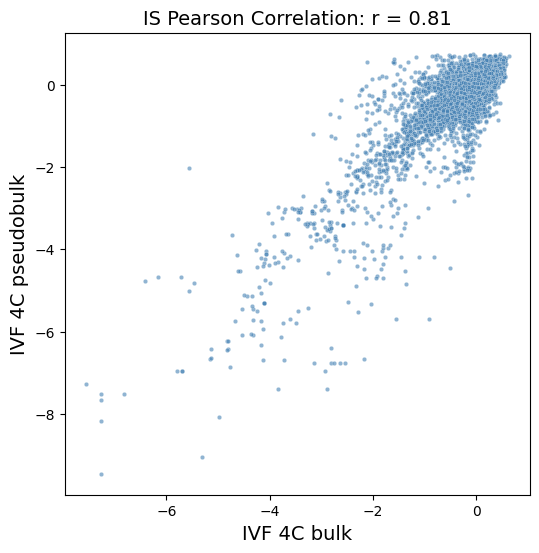

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
df = pd.read_csv('PA_IVF_4C_IS.bedGraph', sep='\t')

# 提取两个样品
x = df['IVF_4C_bulk']
y = df['IVF_4C_pseudobulk']

# 计算皮尔森相关系数
r, p = pearsonr(x, y)
print(r,p)
# 绘制散点图
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=10, color='steelblue', alpha=0.6)
plt.xlabel('IVF 4C bulk', fontsize=14)
plt.ylabel('IVF 4C pseudobulk', fontsize=14)
plt.title(f'IS Pearson Correlation: r = {r:.2f}', fontsize=14)

# 保存图像为 PDF
plt.savefig('IVF_4C_IS_bulk_vs_pseudobulk_scatter.svg', dpi=300, bbox_inches='tight', transparent=True)

0.884013704908557 0.0


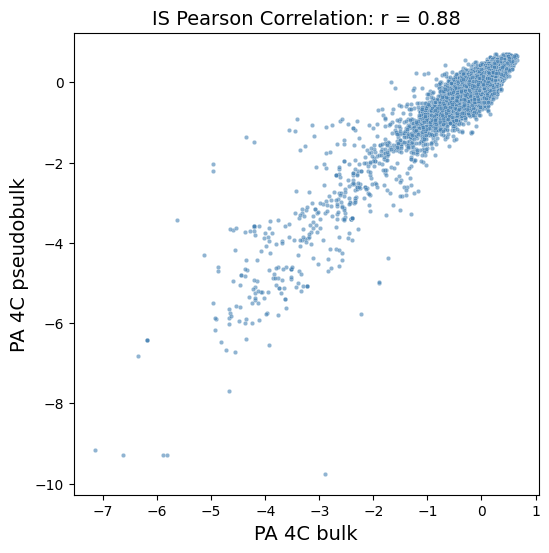

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
df = pd.read_csv('PA_IVF_4C_IS.bedGraph', sep='\t')

# 提取两个样品
x = df['PA_4C_bulk']
y = df['PA_4C_pseudobulk']

# 计算皮尔森相关系数
r, p = pearsonr(x, y)
print(r,p)
# 绘制散点图
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=10, color='steelblue', alpha=0.6)
plt.xlabel('PA 4C bulk',fontsize=14)
plt.ylabel('PA 4C pseudobulk', fontsize=14)
plt.title(f'IS Pearson Correlation: r = {r:.2f}', fontsize=14)

# 保存图像为 PDF
plt.savefig('PA_4C_IS_bulk_vs_pseudobulk_scatter.svg', dpi=300, bbox_inches='tight', transparent=True)

0.799657614066574 4.20345629770405e-213


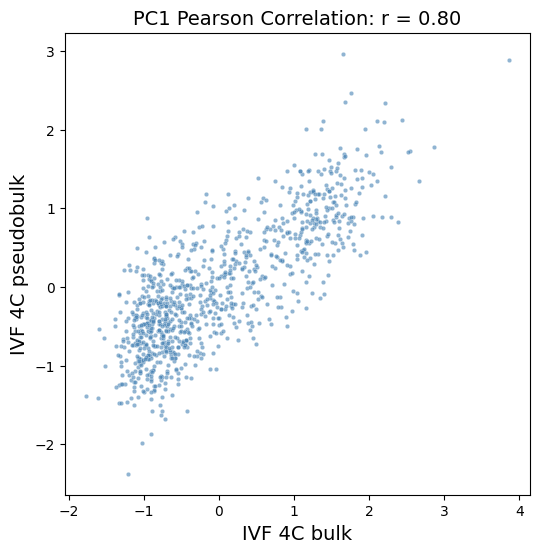

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# 设置绘图样式
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
df = pd.read_csv('PA_IVF_4C_PC1.bedGraph', sep='\t')


x = df['IVF_4C_bulk']
y = df['IVF_4C_pseudobulk']

# 计算皮尔森相关系数
r, p = pearsonr(x, y)
print(r,p)
# 绘制散点图
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=10, color='steelblue', alpha=0.6)
plt.xlabel('IVF 4C bulk', fontsize=14)
plt.ylabel('IVF 4C pseudobulk', fontsize=14)
plt.title(f'PC1 Pearson Correlation: r = {r:.2f}', fontsize=14)

# 保存图像为 SVG
plt.savefig('IVF_4C_AB_bulk_vs_pseudobulk_scatter.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


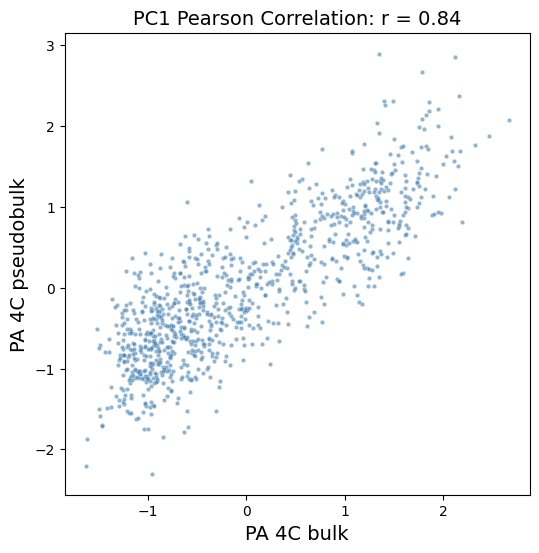

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# 设置绘图样式
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
df = pd.read_csv('PA_IVF_4C_PC1.bedGraph', sep='\t')

x = df['PA_4C_bulk']
y = df['PA_4C_pseudobulk']


# 计算皮尔森相关系数
r, p = pearsonr(x, y)

# 绘制散点图
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=10, color='steelblue', alpha=0.6)
plt.xlabel('PA 4C bulk', fontsize=14)
plt.ylabel('PA 4C pseudobulk', fontsize=14)
plt.title(f'PC1 Pearson Correlation: r = {r:.2f}', fontsize=14)

# 保存图像为 SVG
plt.savefig('PA_4C_AB_bulk_vs_pseudobulk_scatter.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
